In [1]:
import sys, datetime
from qick.asm_v2 import QickSweep1D

sys.path.append("../Libraries") # replace this with your location of the Libraries folder
from resonator_power_spectroscopy import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load Autonics TM4 Driver


  0%|          | 0/2000000 [00:00<?, ?it/s]

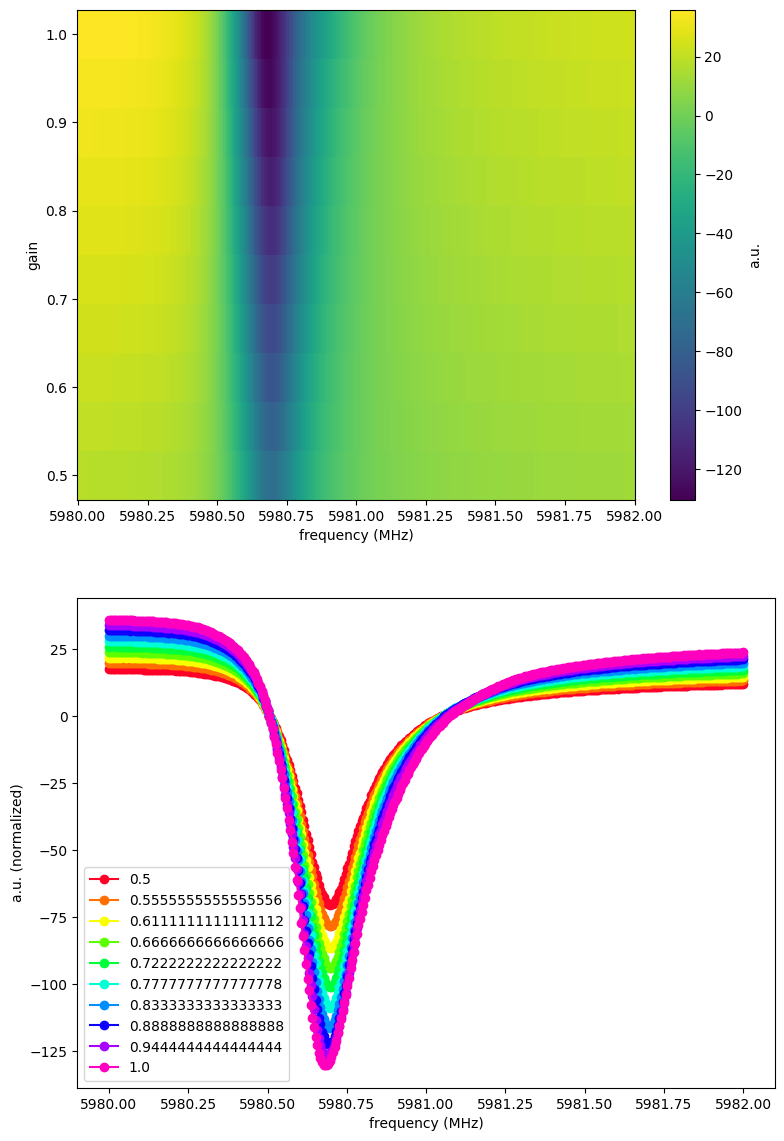

In [7]:
date = str(datetime.datetime.now().strftime('%Y_%m_%d'))
time = str(datetime.datetime.now().strftime('%H;%M;%S'))

datapath = f'G:\\My Drive\\chatot\\data\\resonator_power_spectroscopy\\{date}\\{time}\\' # replace this with your data location

config_file = f"..\\..\\..\\..\\cfg\\llosta.json" # replace this with your config

meas = resonator_power_spectroscopy(path=datapath, config_file=config_file)

#frequency
center = 5981
span = 1
#gain
min_gain = 0.5
max_gain = 1

meas.cfg.expt = {
    "n_avg": 500,
    "ro_len": 5,
    "pulse_len": 5, #ro_len and pulse_len should be the same
    "phase": 0,
    "gain": QickSweep1D('gain_loop', min_gain, max_gain),
    "trig_offset": 0.5,
    "freq": QickSweep1D('freq_loop', center - span, center + span),
    "freq_steps": 400,
    "center": center,
    "span": span,
    "min_gain": min_gain,
    "max_gain": max_gain,
    "gain_steps": 10
}

data = meas.acquire()
meas.display(save=False)
#meas.savedata()